# Série 6
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices pour la semaine prochaine.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français or in English** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. **Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.**

Les tentatives infructueuses, les explications, commentaires et analyses des échecs **rapportent des points**. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Contributions
*Exercice : [contribution Radomski, contribution Darmanger]*
- 1 : [40%, 60%]
- 2 : [40%, 60%]

In [1]:
import math

## Exercice 1
Vous allez devoir implémenter un algorithme pour trouver la meilleure combinaison dans la multiplication de n matrices  M<sub>1</sub>, ..., M<sub>n</sub> dont le vecteur D=(d<sub>0</sub>,d<sub>1</sub>,...d<sub>n</sub>) fournit les dimenstion de la matrice M<sub>i</sub> = d<sub>i-1</sub> × d<sub>i</sub>

Vous devez:
* générer un nombre entier aléatoire *random* plus grand ou égal à 3 (le nombre de matrices)  
* générer un vecteur de *random*+1 dimensions aléatoires comprises entre, 2 et 19: D<sub>*random*</sub>
* générer random matrices à valeurs entières M<sub>i</sub> de dimension d<sub>i-1</sub> × d<sub>i</sub> pour i = 1, ..., *random*
* programmer l'algorithme de recherche de la meilleures combinaison
* trouver la meilleure combinaison et multiplier leurs matrices selon la meilleure combinaison
* tester éventuellement avec des combinaisons aléatoires de leur suite de matrices (pour ce dernier exercice, il faut implémenter un compteur de multiplications scalaires dans la fonction de multiplication matricielle)

In [2]:
import random
random.seed(0)
import sys

class MatrixMult:
    nmbre_matr = 1
    dimensions = []
    MAX_VALUE = sys.maxsize 

    def __init__(self, dimensions, nmbre_matr):
        self.nmbre_matr = nmbre_matr 
        self.dimensions = dimensions
        self.best_pivot = [[0 for i in range(nmbre_matr+1)] for j in range(nmbre_matr+1)] 
        self.pivots_in_postorder = []

    def best_n_mult(self,high):
        print(high)
        best_value = [[0 for i in range(high+1)] for j in range(high+1)] 
        h=2
        while h<=high:
            l=h-2
            while l>=0:
                min_n_mult = self.MAX_VALUE+1
                i=l+1
                while i<=h-1:
                    n_mult = self.dimensions[l]*self.dimensions[i]*self.dimensions[h] + best_value[l][i] + best_value[i][h]
                    if min_n_mult > n_mult:
                        min_n_mult = n_mult
                        self.best_pivot[l][h] = i
                    i+=1
                best_value[l][h] = min_n_mult
                print(l,h,best_value[l][h])
                l-=1
            h+=1
        print(best_value)
        return best_value[0][high]

    def write_pivots_in_postorder(self,l,h):
        if ( l+1 < h ):
            b = self.best_pivot[l][h]
            self.write_pivots_in_postorder(l, b)
            self.write_pivots_in_postorder(b, h)
            self.pivots_in_postorder.append(b)
            print(b)



In [3]:
scalar_mult_count = 0  # global variable for counting scalar multiplications

def matrix_multiplication(A, B):
    global scalar_mult_count
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])
    if cols_A != rows_B:
        raise ValueError("Matrix cannot be multiplied")
    
    result = [[0] * cols_B for _ in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
                scalar_mult_count += 1  # count each scalar multiplication
    return result

In [4]:
def do_operation(a, matrices, l, h):
    """
    Multiplies the matrices from index l to h according to the optimal order determined

    :param a: Instance of MatrixMult containing the optimal pivots.
    :param matrices: List of matrices to be multiplied.
    :param l: Starting index
    :param h: Ending index
    :return: Matrix resulting from optimal multiplication
    """
    # base case : if the range is only one matrix
    if l == h - 1:
        return matrices[l]
    else:
        # recursive case : multiply the matrices from l to b and b to h
        b = a.best_pivot[l][h]
        left_matrix = do_operation(a, matrices, l, b)
        right_matrix = do_operation(a, matrices, b, h)
        # multiply the two matrices
        result = matrix_multiplication(left_matrix, right_matrix)
        return result

In [5]:
def random_parenthesization(matrices):
    """ 
    Returns the result of randomly parenthesizing the matrices in the list.
    Use to test the functionality of the optimal matrix multiplication algorithm. 
    """
    if len(matrices) == 1:
        return matrices[0]
    else:
        k = random.randint(1, len(matrices) - 1)
        left = random_parenthesization(matrices[:k])
        right = random_parenthesization(matrices[k:])
        return matrix_multiplication(left, right)


In [6]:
MAX_RANDOM = 20

# number of matrices (minimum 3)
nmbre_matr = random.randint(3, MAX_RANDOM)

# generate a vector with dimensions d[0..n] between 2 and 19
d = [random.randint(2, 19) for _ in range(nmbre_matr + 1)]

# generate n matrices with dimensions d[i-1] x d[i].
matrices = []
for i in range(1, nmbre_matr + 1):
    rows = d[i - 1]
    cols = d[i]
    matrix = [[random.randint(1, 20) for _ in range(cols)] for _ in range(rows)]
    matrices.append(matrix)

# find the optimal number of scalar multiplications
a = MatrixMult(d, nmbre_matr)
a.best_n_mult(nmbre_matr)
a.write_pivots_in_postorder(0, nmbre_matr)


15
0 2 450
1 3 540
0 3 1350
2 4 3060
1 4 1458
0 4 2223
3 5 4284
2 5 5440
1 5 2172
0 5 2802
4 6 2618
3 6 5984
2 6 6980
1 6 2634
0 6 3129
5 7 2618
4 7 5797
3 7 9350
2 7 8850
1 7 3195
0 7 3960
6 8 2431
5 8 4433
4 8 7480
3 8 10989
2 8 10841
1 8 3858
0 8 4443
7 9 1768
6 9 3264
5 9 4496
4 9 6400
3 9 8848
2 9 10288
1 9 4170
0 9 4530
8 10 1872
7 10 4216
6 10 4848
5 10 6512
4 10 8848
3 10 11440
2 10 11728
1 10 4602
0 10 5412
9 11 864
8 11 1488
7 11 2814
6 11 3936
5 11 4860
4 11 6288
3 11 8124
2 11 9204
1 11 4926
0 11 5196
10 12 1188
9 12 1392
8 12 2346
7 12 3936
6 12 4662
5 12 5784
4 12 7410
3 12 9312
2 12 9864
1 12 5124
0 12 5619
11 13 396
10 13 1044
9 13 1548
8 13 2172
7 13 3498
6 13 4620
5 13 5544
4 13 6972
3 13 8808
2 13 9888
1 13 5322
0 13 5592
12 14 330
11 14 576
10 14 1116
9 14 1680
8 14 2200
7 14 3305
6 14 4240
5 14 5010
4 14 6200
3 14 7730
2 14 8630
1 14 5412
0 14 5637
13 15 300
12 15 880
11 15 876
10 15 1956
9 15 2080
8 15 2850
7 15 4155
6 15 4790
5 15 5710
4 15 7050
3 15 8630
2 15 91

In [7]:

# multiply matrices according to the best combination

scalar_mult_count = 0  # resetting the counter before testing
final_matrix = do_operation(a, matrices, 0, nmbre_matr)
optimal_scalar_mult_count = scalar_mult_count

print("Final matrix:")
for row in final_matrix:
    print(row)
print(f"\nScalar multiplications count: {optimal_scalar_mult_count}")


Final matrix:
[103563271949187971812839191211, 286685409667883544508409043755, 297895135463868351220286463634, 321636500603098360819706075786, 267070850100423279523016702020, 268841345470531171519818935248, 216664460344810468835015264476, 363081604603276656183979351697, 309161478820927308310510133854, 223119484559215910368487990863]
[40232649729350900781619859765, 111372627115596613581838148637, 115727423589527670957699905526, 124950558488342680154864650790, 103752689179892489727794461132, 104440497885714283122539745000, 84170625143229523180684479204, 141051308501758667553643971927, 120104215066435778090155095882, 86678297248622200947777835017]
[95052261602308415718124256460, 263125102599476325705588159932, 273413593575697773034060736520, 295203851913495601143225338144, 245122501753505434288619765444, 246747494723986224614831007376, 198858597038390708930682777456, 333242924968412187014564957664, 283754049180484157229286558300, 204783136102596818267129937396]
[61066203511676746816732944

In [8]:

# test with random combinations of parentheses to verify 
# equality and compare scalar multiplications (must be greater than or 
# or equal to the best combination)

num_tests = 10  # number of tests with random parentheses

for test in range(num_tests):
    scalar_mult_count = 0  # resetting the counter before testing
    final_matrix_random = random_parenthesization(matrices)
    random_scalar_mult_count = scalar_mult_count
    print(f"\nTest {test + 1}:")
    print("Scalar multiplications count (random):", random_scalar_mult_count)

    if final_matrix_random == final_matrix:
        print("The final matrices are equal")
    else:
        print("The final matrices are not equal")

    if random_scalar_mult_count >= optimal_scalar_mult_count:
        print("Random scalar multiplication count is greater (or equal) to optimal (expected)")
    else:
        print("Random scalar multiplication count is less than optimal (unexpected)")



Test 1:
Scalar multiplications count (random): 22566
The final matrices are equal
Random scalar multiplication count is greater (or equal) to optimal (expected)

Test 2:
Scalar multiplications count (random): 18890
The final matrices are equal
Random scalar multiplication count is greater (or equal) to optimal (expected)

Test 3:
Scalar multiplications count (random): 25078
The final matrices are equal
Random scalar multiplication count is greater (or equal) to optimal (expected)

Test 4:
Scalar multiplications count (random): 23331
The final matrices are equal
Random scalar multiplication count is greater (or equal) to optimal (expected)

Test 5:
Scalar multiplications count (random): 23994
The final matrices are equal
Random scalar multiplication count is greater (or equal) to optimal (expected)

Test 6:
Scalar multiplications count (random): 19023
The final matrices are equal
Random scalar multiplication count is greater (or equal) to optimal (expected)

Test 7:
Scalar multiplicati

In [9]:
# Nous vous mettons à disposition une matrice pour que vous puissiez tester votre algorithme de multiplication matricielle.
# Vous devez quand même implémenter la partie "aléatoire" demandée et la tester vous-même.
dimensions = [3, 3, 3, 3, 2, 2]
nmbre_matr = 5
print("Dimensions vector:")
print(nmbre_matr, dimensions)
print()

print("\"Random\" matrices: ")
# Vous pouvez convertir l'équivalent de cette matrice 3D en la structure de données que vous avez implémentée
matrices = [[[10,6,19],[7,16,13],[8,12,18]],[[13,20,14],[6,8,5],[14,3,9]],[[15,18,1],[7,7,6],[6,20,17]],[[4,1],[14,14],[15,9]],[[6,10],[17,17]]]
print(matrices)
print()
a = MatrixMult(dimensions, nmbre_matr)
print("best_n_mult: ")
a.best_n_mult(nmbre_matr)
print()
print("write_pivots_in_postorder: ")
a.write_pivots_in_postorder( 0, nmbre_matr)
print()

# Fonction qui multiplie les matrices dans le bon ordre.
# Vous n'êtes pas obligé de l'utiliser et vous pouvez utiliser une autre fonction que vous avez créée.
# Si c'est le cas, apportez les modifications nécessaires ici pour que l'assertion fonctionne
pivots = a.pivots_in_postorder
final_matrix = do_operation(a, matrices, 0, nmbre_matr)

print("Final matrix:")
print(final_matrix)
assert final_matrix == [[7782820,9373872],[6874034,8281554],[7700480,9274968]]

Dimensions vector:
5 [3, 3, 3, 3, 2, 2]

"Random" matrices: 
[[[10, 6, 19], [7, 16, 13], [8, 12, 18]], [[13, 20, 14], [6, 8, 5], [14, 3, 9]], [[15, 18, 1], [7, 7, 6], [6, 20, 17]], [[4, 1], [14, 14], [15, 9]], [[6, 10], [17, 17]]]

best_n_mult: 
5
0 2 27
1 3 27
0 3 54
2 4 18
1 4 36
0 4 54
3 5 12
2 5 30
1 5 48
0 5 66
[[0, 0, 27, 54, 54, 66], [0, 0, 0, 27, 36, 48], [0, 0, 0, 0, 18, 30], [0, 0, 0, 0, 0, 12], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

write_pivots_in_postorder: 
4
3
2
1

Final matrix:
[[7782820, 9373872], [6874034, 8281554], [7700480, 9274968]]


### Explications

Comme vu en classe, la multiplication de matrices est associative mais pas commutative, ce qui signifie que l'ordre dans lequel nous effectuons les multiplications peut affecter le nombre total de calculs. Notre objectif est donc de déterminer l'ordre de parenthésation qui minimise ce nombre.

Pour faire cela, on a suivi ces étapes  :

1.  **Génération aléatoire des données (comme demandé) :**

    -   Nous avons généré un nombre aléatoire de matrices (au moins 3)
    -   Nous avons créé un vecteur de dimensions aléatoires pour ces matrices.
    -   Nous avons généré les matrices elles-mêmes avec des valeurs entières aléatoires
2.  **Recherche de la meilleure combinaison :**

    -   Nous avons utilisé l'algorithme de programmation dynamique pour trouver l'ordre optimal de multiplication. Cet algorithme calcule le nombre minimal de multiplications scalaires nécessaires pour multiplier la chaîne de matrices.
    -   Les fonctions clés utilisées sont :
        -   `best_n_mult(high)`: calcule le coût minimal de multiplication pour les sous-chaînes de matrices en stockant les résultats dans `best_value`.
        -   `write_pivots_in_postorder(l, h)`: détermine l'ordre optimal de parenthésation en parcourant les pivots optimaux.
            - `best_value[i][j]` contient le coût minimal pour multiplier la sous-chaîne de matrices de M<sub>i</sub> à M<sub>j</sub>.
            - `best_pivot[i][j]` enregistre le pivot optimal (indice où couper) pour atteindre ce coût minimal.
3.  **Multiplication des matrices selon l'ordre optimal :**

    -   Nous avons multiplié les matrices en suivant l'ordre optimal obtenu, en utilisant la fonction récursive `do_operation(a, matrices, l, h)`. Cette fonction utilise les pivots optimaux pour décider comment associer les matrices.
    -   Nous avons également compté le nombre de multiplications scalaires effectuées grâce à un compteur global `scalar_mult_count` dans la fonction `matrix_multiplication(A, B)`. Ce compteur est incrémenté à chaque multiplication scalaire.
        -   Plus de détails sur la multiplication matricielle sont données dans une série d'exercices précédents.
4.  **Comparaison avec des parenthésations aléatoires :**

    -   Pour évaluer l'efficacité de l'ordre optimal, nous avons multiplié les matrices en utilisant des parenthésations aléatoires à l'aide de la fonction `random_parenthesization(matrices)`.
    -   Nous avons comparé le nombre de multiplications scalaires pour chaque parenthésation aléatoire avec celui obtenu avec l'ordre optimal.
    -   Les résultats ont montré que l'ordre optimal minimise effectivement le nombre de multiplications scalaires par rapport aux ordres aléatoires.
5.  **Vérification avec un jeu de données spécifique :**

    -   Nous avons testé notre implémentation avec un ensemble de matrices et de dimensions fournies pour vérifier que le résultat obtenu correspondait bien au résultat attendu
    -   L'assertion finale confirme que notre algorithme fonctionne correctement.
  

#### Note sur best_n_mult
-   **best_value** : Cette matrice stocke le coût minimal de multiplication pour chaque sous-chaîne de matrices.
    -   `bestValue[1][1]` représente le coût de multiplier la matrice M₁ seule, ce qui est zéro puisque aucune multiplication n'est nécessaire.
    -   `bestValue[1][2]` représente le coût minimal pour multiplier les matrices M<sub>1</sub> et M<sub>2</sub>.
    -   `bestValue[1][4]` contiendra le coût minimal pour multiplier toutes les matrices de M<sub>1</sub> à M<sub>4</sub>.
-   **best_pivot** : Cette matrice enregistre le pivot optimal (l'indice où découper) pour chaque sous-chaîne qui donne le coût minimal.
    -   `bestPivot[1][3] = 2` signifie que pour multiplier les matrices de M<sub>1</sub> à M<sub>3</sub>, le pivot optimal (l'endroit où séparer la multiplication) est après M<sub>2</sub>.
  

ref: https://en.wikipedia.org/wiki/Matrix_chain_multiplication

## Exercice 2 - La revanche du puits magique

#### Rappel de l'énoncé puits magique 

Il y a un puits magique profond dans une forêt qui a quelques nénuphars sur ses eaux. Vous avez un grand panier vide et quelques pièces de monnaie, et vous vous tenez à côté du puits. Vous avez plus de pièces que de nénuphars dans le puits. Le puits a pris note du fait que votre panier est vide. Si vous lancez une pièce dans le puits, le puits lancera un nénuphar dans votre panier. Si vous lancez quatre pièces à la fois dans le puits, le puits prendra note du nombre de nénuphars qu'il a lancés dans votre panier jusqu'à présent. Si vous lancez deux pièces à la fois dans le puits, le puits lancera autant de nénuphars dans votre panier qu'il avait pris note la dernière fois. Si vous lancez une pièce, ou deux pièces à la fois, dans le puits, et qu'il ne reste pas assez de nénuphars dans le puits, le puits ne lancera aucun nénuphar.
Étant donné $L$ le nombre de nénuphars dans le puits au début, retournez le nombre minimum de pièces que vous devrez lancer dans le puits pour qu'il lance tous ses nénuphars dans votre panier.

Lors du cours de récurrence, vous aviez certainement effectué une recherche exhaustive en créant un arbre des possibilités et en prenant le minimum parmi les feuilles. Cet algorithme, tout à fait correct pour une première approche, avait cependant une complexité temporelle de $O(3^L)$. Nous allons utiliser la programmation dynamique pour améliorer cela.

Prenons une liste $u$ de termes $u_{i}$ correspondant au plus petit nombre de pièces pour obtenir $i$ fleurs. Que valent $u_0$ et $u_1$ ?

#### Réponse

- i=0 : $u_0 = 0$ car il n'y a pas besoin de pièces pour obtenir 0 fleurs.
- i=1 : $u_1 = 1$ car il faut une pièce pour obtenir 1 fleur.

Pour $i>1$, il existe deux façons possibles d'obtenir $i$ fleurs - soit nous collectons d'abord $i-1$ fleurs, puis utilisons une opération d'une pièce pour obtenir un autre fleurs, soit la dernière opération doit avoir été une opération de deux pièces. Cela signifie que nous avions demandé au puits de se souvenir de l'état de notre panier à $k$ fleurs (où $k$ est un diviseur de $i$) et ensuite appliqué $\frac{i}{k}-1$ opérations de deux pièces.

Avec une expression plus formelle, nous aurions une formule similaire à cela (formule $(1)$) :

$$u_{i}=\min \left(□, \min _{k \mid i}\left\{u_{k}+4+2\left(\frac{i}{k}-1\right)\right\}\right).$$

Que faudrait-il mettre à la place du "□" ?

#### Réponse

La formule décrit les deux façons possibles d'obtenir $i$ fleurs. Ici il manque la première façon d'obtenir ces $i$ fleurs. C'est à dire : "... nous collectons d'abord $i-1$ fleurs, puis utilisons une opération d'une pièce pour obtenir un autre fleurs ...".

Donc Il faudrait mettre $u_{i-1}+1$ car c'est le nombre de pièces que nous aurions utilisé pour obtenir $i-1$ fleurs, puis nous aurions utilisé une opération d'une pièce pour obtenir $i$ fleurs.

$$u_{i}=\min \left(u_{i-1}+1, \min _{k \mid i}\left\{u_{k}+4+2\left(\frac{i}{k}-1\right)\right\}\right).$$

Au lieu d'itérer sur les diviseurs de $i$ comme la formule nous le permettrait, nous allons procéder comme suit :

Au début, nous pouvons dire que toutes les valeurs de la suite, les $u_i$ (sauf $u_0$ et $u_1$), sont égales à l'infini. Maintenant, parcourons toutes les valeurs de $i$ de $2$ à $N$ ($N$ étant un entier que vous choisirez à votre convenance...). Une des possibilités est d'utiliser une pièce et ainsi passer de $i-1$ fleurs à $i$ fleurs, donc nous pouvons dire que $u_i\leftarrow \min(u_i, u_{i-1}+1)$.

À présent, lorsque nous avons déjà $i$ fleurs, nous pouvons également utiliser quatre pièces pour mémoriser l'état de notre panier, puis obtenir plus tard $j \cdot i$ fleurs du puits. Nous devrions donc mettre à jour $u_i$ pour tous les multiples de $i$ avec la formule $(2)$:

$$u_{j \cdot i} = \min(u_{j \cdot i}, u_i + 4 + 2 \cdot (j - 1)), i < j \cdot i ≤ N$$

Implémentez ce travail dans la fonction suivante :

Version qui suit le template imposé :

In [10]:

def min_well_coin(L, test=False):
    U = [math.inf] * (L + 1)
    U[0] = 0
    U[1] = 1

    # For each i...
    for i in range(2, L + 1): # starting from 2 because we already know the values for 0 and 1
        # u_i can be obtained from u_i-1
        U[i] = min(U[i], U[i - 1] + 1)
        # We then update all divisors of i
        for k in range(2, i + 1):
             # if i * k is in the adequate range
            division_condition = i< i * k <= L
            if division_condition:
                # Formula (2):
                U[i*k] = min(U[i*k], U[i] + 4 + 2 * (k-1))

    # Return the correct term from the U sequence
    if test:
        return U[L], U
    return U[L]

Version avec complexité améliorée (itère sur les multiples de $i$ directement) :

In [11]:
# version avec complexité améliorée

def min_well_coin_opti(L, test=False):
    U = [math.inf] * (L + 1) # initialize the list with infinity values of size L+1 (0 to L)
    U[0] = 0
    U[1] = 1

    # For each i...
    for i in range(2, L + 1): # starting from 2 because we already know the values for 0 and 1
        # u_i can be obtained from u_i-1
        U[i] = min(U[i], U[i - 1] + 1)
        # We then update all divisors of i
        for k in range(2, L // i + 1):  # L//i + 1 represents the maximum value of k such that i * k <= L
            # Formula (2):
            U[i*k] = min(U[i*k], U[i] + 4 + 2 * (k-1))

    # Return the correct term from the U sequence
    if test:
        return U[L], U
    return U[L]

In [12]:
min_well_coin(15, True)

(13, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13])

In [13]:
min_well_coin_opti(15, True)

(13, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 13])

In [14]:
assert min_well_coin(12) == 12
assert min_well_coin(13) == 13
assert min_well_coin(15) == 13
assert min_well_coin(16) == 14
assert min_well_coin(17) == 15
assert min_well_coin(18) == 14
assert min_well_coin(19) == 15
assert min_well_coin(21) == 15
assert min_well_coin(22) == 16
assert min_well_coin(23) == 17
assert min_well_coin(93) == 27
assert min_well_coin(94) == 28
assert min_well_coin(96) == 26
assert min_well_coin(97) == 27

In [15]:
assert min_well_coin_opti(12) == 12
assert min_well_coin_opti(13) == 13
assert min_well_coin_opti(15) == 13
assert min_well_coin_opti(16) == 14
assert min_well_coin_opti(17) == 15
assert min_well_coin_opti(18) == 14
assert min_well_coin_opti(19) == 15
assert min_well_coin_opti(21) == 15
assert min_well_coin_opti(22) == 16
assert min_well_coin_opti(23) == 17
assert min_well_coin_opti(93) == 27
assert min_well_coin_opti(94) == 28
assert min_well_coin_opti(96) == 26
assert min_well_coin_opti(97) == 27 

Que pouvait-on choisir pour $N$ en fin de compte ?


- **$L$** : Dans le contexte de la fonction `min_well_coin(L)`, $L$ représente le nombre cible de nénuphars que l'on souhaite obtenir dans le panier.
- **$N$** : Dans la formule donnée, $N$ représente la limite supérieure pour laquelle on va calculer le nombre minimal de pièces pour atteindre chaque quantité de nénuphars, jusqu'à $L$ inclus. $N$ est le nombre maximal de nénuphars que l'on veut envisager pour les calculs dans la liste `U`.
- La liste `U` dans le code est indexée jusqu'à $L$, et cette longueur représente le nombre total d'entrées possibles pour le nombre de nénuphars. En pratique, cela signifie que $N$ correspond à la taille maximale de la liste `U`, qui est $L + 1$ (pour inclure l'indice 0).

On assume alors que $N$ désigne implicitement la valeur maximale pour laquelle on calcule le nombre minimum de pièces, et cette valeur est définie comme étant $L$, l'entrée de la fonction `min_well_coin(L)`. Cela signifie que, pour ce code :

- **$N$** est le plus grand nombre de nénuphars que nous souhaitons atteindre, et ici, nous l'avons implicitement fixé à $L$.
- **Taille de la liste `U`** : On initialise la liste `U` avec $L + 1$ valeurs, ce qui permet de stocker le nombre minimal de pièces pour obtenir tous les nombres de nénuphars de 0 jusqu'à $L$.

Dans cet algorithme, nous ne cherchons pas à aller au-delà de $L$ nénuphars ; nous voulons uniquement savoir le nombre minimal de pièces pour obtenir jusqu'à $L$ nénuphars. Par conséquent, il n'est pas nécessaire de calculer des valeurs pour des nénuphars au-delà de $L$, ce qui signifie que $N$ (le nombre maximal de nénuphars que nous envisageons) est effectivement défini à $L$.

Donc N est égal à L, et est la valeur passé en argument des assertions également.

On remarque aussi qu'on peut utiliser le tableau `U` pour stocker les valeurs de $u_i$ pour $i$ allant de 0 à $L$. Et donc obtenir les résultats inférieurs à $L$ en accédant directement à `U[i]`.

In [16]:
list_U = min_well_coin(97, True)[1]

assert list_U[12] == 12
assert list_U[13] == 13
assert list_U[15] == 13
assert list_U[16] == 14
assert list_U[17] == 15
assert list_U[18] == 14
assert list_U[19] == 15
assert list_U[21] == 15
assert list_U[22] == 16
assert list_U[23] == 17
assert list_U[93] == 27
assert list_U[94] == 28
assert list_U[96] == 26
assert list_U[97] == 27

Affichez sur un graphe les valeurs de la fonction pour $L$ allant de $0$ à $1000$. Quel est l'aspect du graphe ?

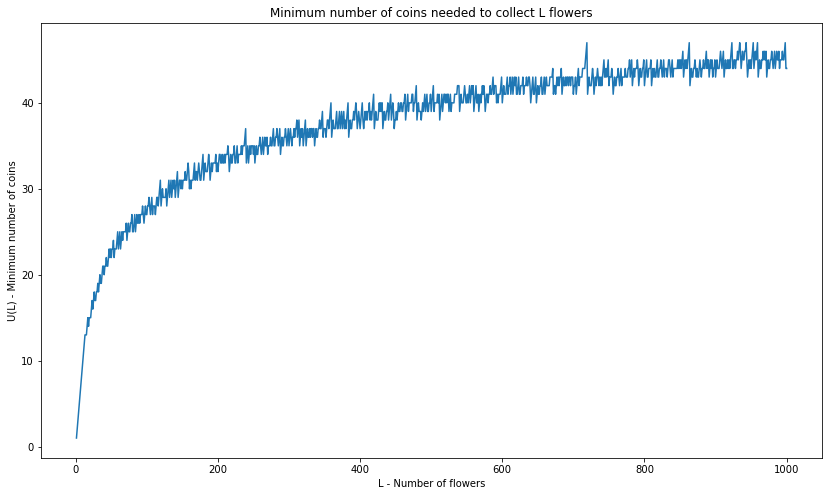

In [17]:
import matplotlib.pyplot as plt

L_values = range(1, 1001)
U_values = [min_well_coin(L) for L in L_values]

plt.figure(figsize=(14, 8))
plt.plot(L_values, U_values)
plt.xlabel("L - Number of flowers")
plt.ylabel("U(L) - Minimum number of coins")
plt.title("Minimum number of coins needed to collect L flowers")
plt.show()


### Explications

-   On observe une forte augmentation du nombre minimal de pièces pour les petites valeurs de L (jusqu'à environ 200 fleurs). Cela s'explique par le fait que chaque fleur ajoutée nécessite souvent un coût additionnel, car les stratégies (de mémorisation et d'accumulation avec multiples) ne sont pas encore assez rentables pour réduire le coût de manière significative pour l'instant.
  
-   Après environ 200 fleurs, le nombre minimal de pièces nécessaires continue d'augmenter, mais de manière moins rapide et de façon plus irrégulière. Cela montre que l'algorithme commence à tirer bénéfices des stratégies de mémorisation. On voit des sauts qui se produisent, c'est lorsque l'utilisation de l'opération "lancer quatre pièces pour mémoriser l'état, puis lancer des paires de pièces pour dupliquer le nombre de nénuphars", devient plus avantageuse que d'ajouter des nénuphars un par un 
  
-   Globalement, le nombre de pièces nécessaires pour obtenir $L$ fleurs augmente avec $L$, mais la courbe montre que les optimisations de l'algorithme permettent d'obtenir des "économies" importante. Plutôt que de croître de manière linéaire ou exponentielle, la courbe devient de plus en plus plate, ce qui indique une amélioration de l'efficacité pour les grandes valeurs de $L$ grâce aux stratégies mises en place. On voit globalement une forme logarithmique.

Ce graphique montre bien l'efficacité de l'approche dynamique. En utilisant la programmation dynamique, nous avons pu réduire la complexité.

### Explications Algorithmiques

Dans cet algorithme, nous utilisons la programmation dynamique pour calculer le nombre minimal de pièces nécessaires pour obtenir jusqu'à $L$ fleurs.

La formule (2) permet de propager le coût minimal en partant du nombre minimal de pièces pour obtenir $i$ fleurs et en le réutilisant pour calculer efficacement le coût pour des multiples de $i$ (comme $2⋅i$, $3⋅i$, etc.). En utilisant 4 pièces pour mémoriser $i$ fleurs, puis en ajoutant des fleurs par étapes de 2 pièces, on minimise le coût pour atteindre chaque multiple $j⋅i$ sans recalculer chaque possibilité depuis zéro. Cela optimise le nombre de pièces nécessaires pour obtenir jusqu'à $N$ fleurs en mettant à jour chaque $u_{j \cdot i}$ avec le coût minimal calculé.

##### Implémentation
 
Nous initialisons un tableau $U$ où $U[i]$ représente le nombre minimal de pièces nécessaires pour obtenir $i$ fleurs. Les valeurs initiales sont $U[0] = 0$ et $U[1] = 1$.

Pour chaque nombre de fleurs $i$ de $2$ à $L$, nous considérons deux possibilités :

1. **Ajouter une fleur en partant de $i - 1$ fleurs** : Cela coûte une pièce supplémentaire, donc $U[i] = \min(U[i], U[i - 1] + 1)$.

2. **Utiliser l’opération de mémorisation et de récupération de l’état** :
    - Lorsque nous avons $i$ fleurs, nous lançons 4 pièces pour "mémoriser" cet état.
    - Ensuite, pour chaque entier $j \geq 2$ tel que $i \times j \leq L$, nous pouvons multiplier le nombre de fleurs par $j$ en lançant 2 pièces supplémentaires pour chaque itération après la première.
    - Le coût total pour atteindre $i \times j$ fleurs est donc $U[i] + 4 + 2 \times (j - 1)$.
    - Nous mettons à jour $U[i \times j]$ si ce coût est inférieur à la valeur actuellement stockée.

En parcourant tous les $i$ de $2$ à $L$ et en appliquant ces deux possibilités, nous construisons le tableau $U$ de manière efficace, en réduisant la redondance des calculs.

#### Complexité

Quelle est la complexité temporelle de cet algorithme ? Que pouvez-vous en dire au regard de la recherche exhaustive codée plus tôt en lab ?

- Boucle **externe** : La boucle principale s'exécute pour chaque $i$ de $2$ à $L$, donc $O(L)$ itérations
- Boucle **interne** : Pour chaque $i$, on met à jour uniquement les multiples de $i$ jusqu'à $L$, donc $O(\frac{L}{i})$ itérations
- La **complexité temporelle** totale de l'algorithme est donc environ:
$$
O(L) + O\left(\sum_{i=2}^{L} \frac{L}{i}\right) = O(L) + O(L \cdot \log L) = O(L \log L)
$$

  - (On passe de la somme $\sum_{i=2}^{L} \frac{L}{i}$ à $L \cdot \log L$ car $\sum_{i=2}^{L} \frac{1}{i} \approx \log L$. Donc, $\sum_{i=2}^{L} \frac{L}{i} \approx L \cdot \log L$)


Notes : version simple (comme sur le template fourni) de l'algorithme, qui itère sur la range (1, i+1) pour chaque i, la complexité est environ $O(L^2)$. Car boucle externe s'écute environ $L$ fois, et la boucle interne dans le pire cas peut s'exécuter jusqu'à L fois pour certains cas (même si toutes les itérations ne sont pas prises en compte pour toutes les valeurs de $i$).

##### Analyse de la complexité
Comparé à la recherche exhaustive qui avait une complexité exponentielle $O(3^L)$, notre algorithme est beaucoup plus efficace. La recherche exhaustive devenait rapidement inutilisable pour des valeurs de $L$ encore petite, alors que l'algorithme dynamique que nous avons mis en place permet de calculer le nombre minimal de pièces pour de grands $L$ en un temps raisonnable. La recherche exhaustive explore toutes les combinaisons possibles d'actions (lancer 1, 2 ou 4 pièces) pour atteindre $L$ nénuphars, ce qui conduit à une complexité exponentielle en $L$, soit $O(3^L)$. Ici nous avons une complexité logarithmique, ce qui est bien plus efficace.
 
Conclusion : L'utilisation de la programmation dynamique nous a permis de réutiliser les résultats déjà calculés pour construire les solutions optimales pour des valeurs supérieures de $L$, évitant ainsi les calculs redondants et réduisant significativement le temps de calcul, c'est globalement bien plus performant.

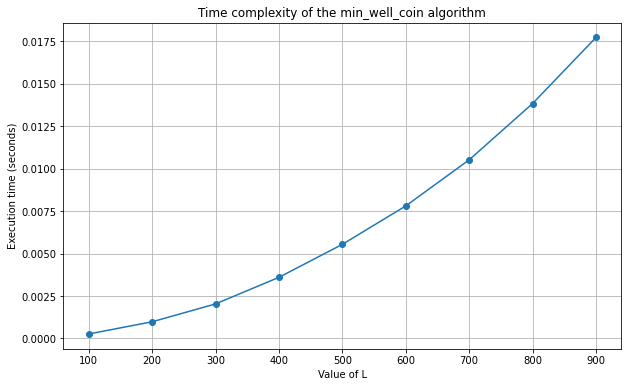

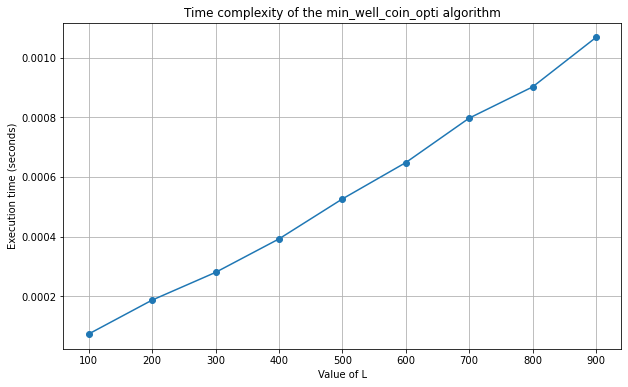

In [18]:
import timeit

L_values = list(range(100, 1000, 100))

times = []
for L in L_values:
    time_taken = timeit.timeit(lambda: min_well_coin(L), number=10)
    times.append(time_taken / 10) 

plt.figure(figsize=(10, 6))
plt.plot(L_values, times, marker='o', linestyle='-')
plt.xlabel("Value of L")
plt.ylabel("Execution time (seconds)")
plt.title("Time complexity of the min_well_coin algorithm")
plt.grid()
plt.show()


times = []
for L in L_values:
    time_taken = timeit.timeit(lambda: min_well_coin_opti(L), number=10)
    times.append(time_taken / 10)  

# Plot des résultats
plt.figure(figsize=(10, 6))
plt.plot(L_values, times, marker='o', linestyle='-')
plt.xlabel("Value of L")
plt.ylabel("Execution time (seconds)")
plt.title("Time complexity of the min_well_coin_opti algorithm")
plt.grid()
plt.show()